In [1]:
import numpy as np
from src.utils.utils import *
from src.utils import plot_config
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100

/opt/anaconda3/envs/dpmol/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data_engs = np.load("data/conditionalMADE-data/484-z4-1mus/train_1mus_eng.npy")[:, 0]
neigh, coup, len_neigh = get_couplings(22, "data/couplings/484-z4.txt")
print(f"mean dataset: {data_engs.mean()}")
print(f"min dataset: {data_engs.min()}")

mean dataset: -0.7021283618736135
min dataset: -0.7433134379818196


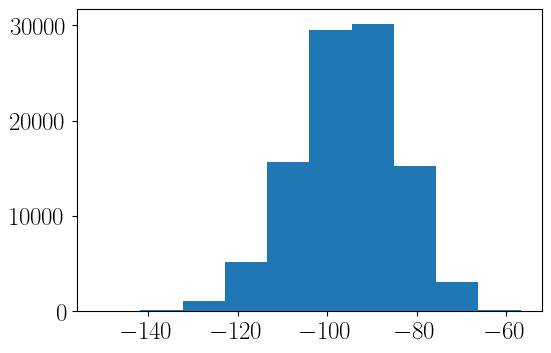

In [3]:
generations060 = np.load("data/made-samples/484spins/sample-100000_size-485_1us-emean-0.60.npz")
samples060 = generations060["sample"]
logprob060 = generations060["log_prob"]

plt.hist(logprob060)
plt.show()

# engs060 = []
# for sample in samples060:
#     engs060.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
# samples065 = np.load("sample-100000_size-485_1us-emean-0.65.npz")
# samples065 = samples065["sample"]
# engs065 = []
# for sample in samples065:
#     engs065.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
# samples068 = np.load("sample-100000_size-485_1us-emean-0.68.npz")
# samples068 = samples068["sample"]
# engs068 = []
# for sample in samples068:
#     engs068.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

# # Mean of the dataset
# samples07021 = np.load("sample-100000_size-485_1us-emean-0.7021.npz")
# samples07021 = samples07021["sample"]
# engs07021 = []
# for sample in samples07021:
#     engs07021.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
# samples073 = np.load("sample-100000_size-485-1us-emean-0.73.npz")
# samples073 = samples073["sample"]
# engs073 = []
# for sample in samples073:
#     engs073.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
# samples075 = np.load("sample-100000_size-485_1us-emean-0.75.npz")
# samples075 = samples075["sample"]
# engs075 = []
# for sample in samples075:
#     engs075.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
    
# samplesGS = np.load("sample-100000_size-485_1us-emean-GS.npz")
# samplesGS = samplesGS["sample"]
# engsGS = []
# for sample in samplesGS:
#     engsGS.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))


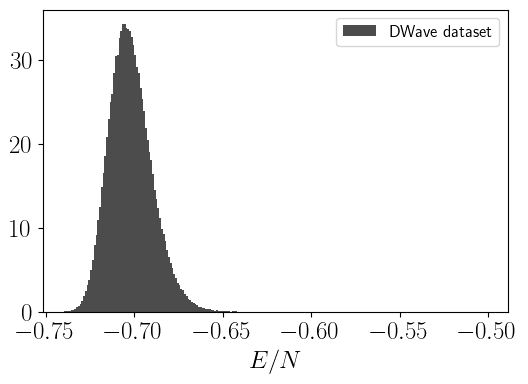

In [4]:
bins = np.arange(-0.74, -0.5, 0.001)
# plt.hist(engs07, bins=50, density=True)
# plt.hist(engs07433, bins=50, density=True)
# plt.hist(engsGS, bins=bins, density=True)
# plt.hist(engs060, bins=bins, density=True)
# plt.hist(engs065, bins=bins, density=True)
# plt.hist(engs068, bins=bins, density=True)
# plt.hist(engs07021, bins=bins, density=True)
# plt.hist(engs073, bins=bins, density=True)
# plt.hist(engs075, bins=bins, density=True)
plt.hist(data_engs, bins=bins, alpha=0.7, label="DWave dataset", density=True, color="k")
# plt.vlines(-0.60, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.60$", colors="b")
# plt.vlines(-0.65, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.65$", colors="orange")
# plt.vlines(-0.75, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.75$", colors="green")
# plt.vlines(-0.68, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.68$", colors="blue")
# plt.vlines(-0.7021, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.7021$ (dataset mean)", colors="orange")
# plt.vlines(-0.73, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.73$", colors="green")
# plt.vlines(-0.755, 0, 35, linestyles="dashed", label=r"$E_{cond} = -0.755$ (GS)", colors="green")
# plt.yscale("log")
plt.xlabel(r"$E/N$")
plt.legend(fontsize=12)
plt.show()

---
# New CondMADE
---


In [5]:
import numpy as np
from src.utils.utils import *
from src.utils import plot_config
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150

In [6]:
data_engs = np.load("data/conditionalMADE-data/484-z4-1mus/train_1mus_eng.npy")[:, 0]
neigh, coup, len_neigh = get_couplings(22, "data/couplings/484-z4.txt")
print(f"mean dataset: {data_engs.mean()}")
print(f"min dataset: {data_engs.min()}")

mean dataset: -0.7021283618736135
min dataset: -0.7433134379818196


In [7]:
samples067 = np.load("sample-100000_size-968-Econd-0.67_2023-11-10_484-dwave-newMADE.npz")
samples = samples067["sample"]

engs067 = []
for sample in samples:
    engs067.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples065 = np.load("sample-100000_size-968-Econd-0.65_2023-11-10_484-dwave-newMADE.npz")
samples = samples065["sample"]

engs065 = []
for sample in samples:
    engs065.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

samples07 = np.load("sample-100000_size-968-Econd-0.7_2023-11-10_484-dwave-newMADE.npz")
samples = samples07["sample"]

engs07 = []
for sample in samples:
    engs07.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples0755 = np.load("sample-100000_size-968-Econd-0.755_2023-11-10_484-dwave-newMADE.npz")
samples = samples0755["sample"]

engs0755 = []
for sample in samples:
    engs0755.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))


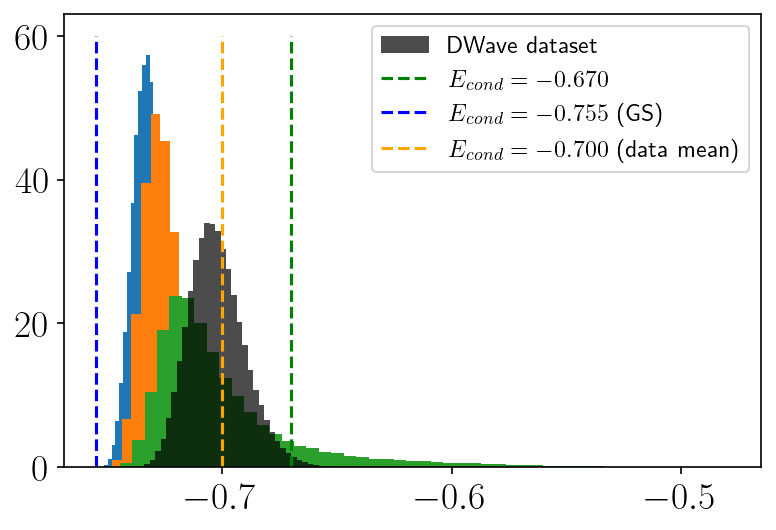

In [8]:
# bins = np.arange(-0.74, -0.5, 0.001)

plt.hist(engs0755, bins=50, alpha=1, density=True)
plt.hist(engs07, bins=50, density=True)
plt.hist(engs067, bins=50, density=True)
plt.hist(data_engs, bins=50, alpha=0.7, label="DWave dataset", density=True, color="k")
plt.vlines(-0.67, 0, 60, linestyle="dashed", color="green", label=r"$E_{cond}=-0.670$")
plt.vlines(-0.755, 0, 60, linestyle="--", color="blue", label=r"$E_{cond}=-0.755$ (GS)")
plt.vlines(-0.7, 0, 60, linestyle="--", color="orange", label=r"$E_{cond}=-0.700$ (data mean)")
# plt.yscale("log")
plt.legend(fontsize=11.5)
plt.show()

In [13]:
samples2layers = np.load("sample-100000_size-968-Econd-0.65_2023-11-10_17-29-19.npz")
samples = samples2layers["sample"]

engs2layers = []
for sample in samples:
    engs2layers.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

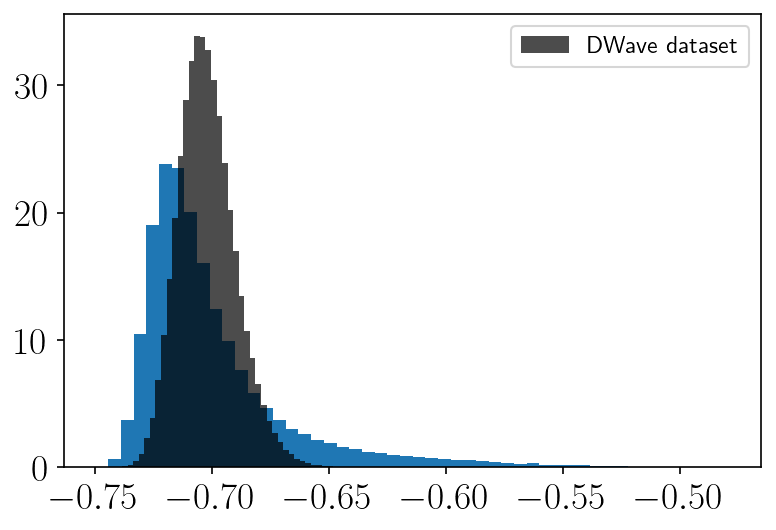

In [14]:
plt.hist(engs067, bins=50, density=True)
plt.hist(data_engs, bins=50, alpha=0.7, label="DWave dataset", density=True, color="k")
plt.legend(fontsize=11.5)
plt.show()